In [1]:
import pandas as pd

In [2]:
path='/home/crdr/Store Forecasting/train.csv'
#path='/home/sachin/Machine Learning/Store Item Demand Forecasting/train.csv'

In [3]:
df=pd.read_csv(path,parse_dates=['date'],index_col='date')

In the store item demand forecasting the dataframe generated after loading csv file have four column the index column is date here because of its uniquiness and progression. 

In [4]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [5]:
import matplotlib.pyplot as plt

On visulizing the sales column of the dataframe we can conlucde that it shows seasonal trends

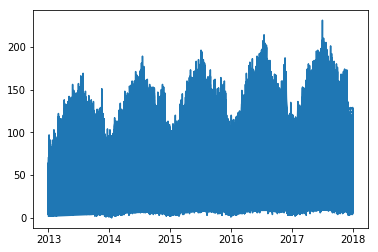

In [6]:
plt.plot(df.index,df['sales'])

In [7]:
plt.show()

Once we done with the visulization of the the sales field we decompose the date field into different form which is day,month,year,and day of week and add them to our existing dataframe.

In [8]:
def expand_date_field(store_df):
    store_df['day']=store_df.index.day
    store_df['month']=store_df.index.month
    store_df['year']=store_df.index.year
    store_df['days_of_week']=store_df.index.dayofweek
    return store_df

In [9]:
ngen_dataframe=expand_date_field(df)

In [10]:
ngen_dataframe.head()

,store,item,sales,day,month,year,days_of_week
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,2,1,2013,2
2013-01-03,1,1,14,3,1,2013,3
2013-01-04,1,1,13,4,1,2013,4
2013-01-05,1,1,10,5,1,2013,5


In [11]:
pd.set_option('display.max_rows', 12)

In [12]:
ngen_dataframe

,store,item,sales,day,month,year,days_of_week
date,,,,,,,
2013-01-01,1,1,13,1,1,2013,1
2013-01-02,1,1,11,2,1,2013,2
2013-01-03,1,1,14,3,1,2013,3
2013-01-04,1,1,13,4,1,2013,4
2013-01-05,1,1,10,5,1,2013,5
2013-01-06,1,1,12,6,1,2013,6
...,...,...,...,...,...,...,...
2017-12-26,10,50,41,26,12,2017,1
2017-12-27,10,50,63,27,12,2017,2


In [25]:
len(ngen_dataframe.item.unique())

50

In [14]:
ngen_dataframe.store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [24]:
ngen_dataframe.year.unique()

array([2013, 2014, 2015, 2016, 2017])


We pivot table in the below script with pivot table below question has been answered like :- <br/>

Q1 How much sales is in the pipeline ? <br/>
Q2 What item at what stage ?<br/>


Basically pivot table group around the column data and give the label outcome accordingly.

In [15]:
grounp_df=ngen_dataframe.groupby('store')

In [18]:
import numpy as np

With the bpivot table in the below script th data frame will group by the item and store individully and it group by the pivot column provided in the dataframe.The function dataframe.mean calculate the mean along the define axis here we have set axsis 0 so it find the from up to down we scale the value by divinding the the aix 

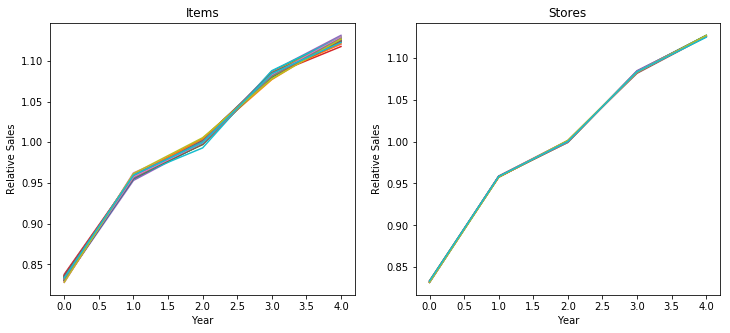

In [29]:
agg_year_item = pd.pivot_table(ngen_dataframe, index='year', columns='item',
                               values='sales', aggfunc=np.mean).values
agg_year_store = pd.pivot_table(ngen_dataframe,index='year', columns='store',
                          values='sales', aggfunc=np.mean).values
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(agg_year_item / agg_year_item.mean(0)[np.newaxis])
plt.title("Items")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.subplot(122)
plt.plot(agg_year_store / agg_year_store.mean(0)[np.newaxis])
plt.title("Stores")
plt.xlabel("Year")
plt.ylabel("Relative Sales")
plt.show()

With the slightly better prediction the submission sales column cast into float and we break the each field as we can able to see in the function below we break down the each column like days of week ,month ,year its item and store 

In [1]:
def slightly_better(test, submission):
    submission[['sales']] = submission[['sales']].astype(np.float64)
    for _, row in test.iterrows():
        dow, month, year = row.name.dayofweek, row.name.month, row.name.year
        item, store = row['item'], row['store']
        base_sales = store_item_table.at[store, item]
        mul = month_table.at[month, 'sales'] * dow_table.at[dow, 'sales']
        pred_sales = base_sales * mul * annual_growth(year)
        submission.at[row['id'], 'sales'] = pred_sales
    return submission

In [ ]:
store_item_table = pd.pivot_table(ngen_dataframe, index='store', columns='item',
                                  values='sales', aggfunc=np.mean)
